# Changing Basis — Coordinate Systems, Projections, and Vector Representations

In this notebook, we explore how to change the **basis** in which a vector is represented. We'll look at:
- What a basis is and why it matters
- Why changing basis is useful in mathematics and machine learning
- How to do it using **dot products** and projections
- When this works (orthogonal vs non-orthogonal cases)
- Practical numerical examples and visualizations

## 1. What is a Basis?

A **basis** is a set of linearly independent vectors that span the entire vector space. Any vector in that space can be written as a unique **linear combination** of these basis vectors.

### Standard Basis in 2D:
The standard basis vectors in 2D are:
- $\vec{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ (unit vector along x-axis)
- $\vec{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (unit vector along y-axis)

Any vector $\vec{v} = \begin{bmatrix} a \\ b \end{bmatrix}$ can be written as: $\vec{v} = a\vec{e}_1 + b\vec{e}_2$

### Alternative Basis:
We can also define new basis vectors, such as:
- $\vec{b}_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$
- $\vec{b}_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$

The key question is: **How do we express a vector in this new coordinate system?**

Let's explore how to express a vector in a new basis using **projections**.


=== Setting up the Basis Change Example ===
Standard basis vectors:
  e₁ = [1 0]
  e₂ = [0 1]

Vector r in standard coordinates: [3 4]
  Meaning: r = 3*e₁ + 4*e₂

New basis vectors:
  b₁ = [2 1]
  b₂ = [-1  2]

Orthogonality check:
  b₁ · b₂ = 2×-1 + 1×2 = 0
  Are b₁ and b₂ orthogonal? ✓ Yes


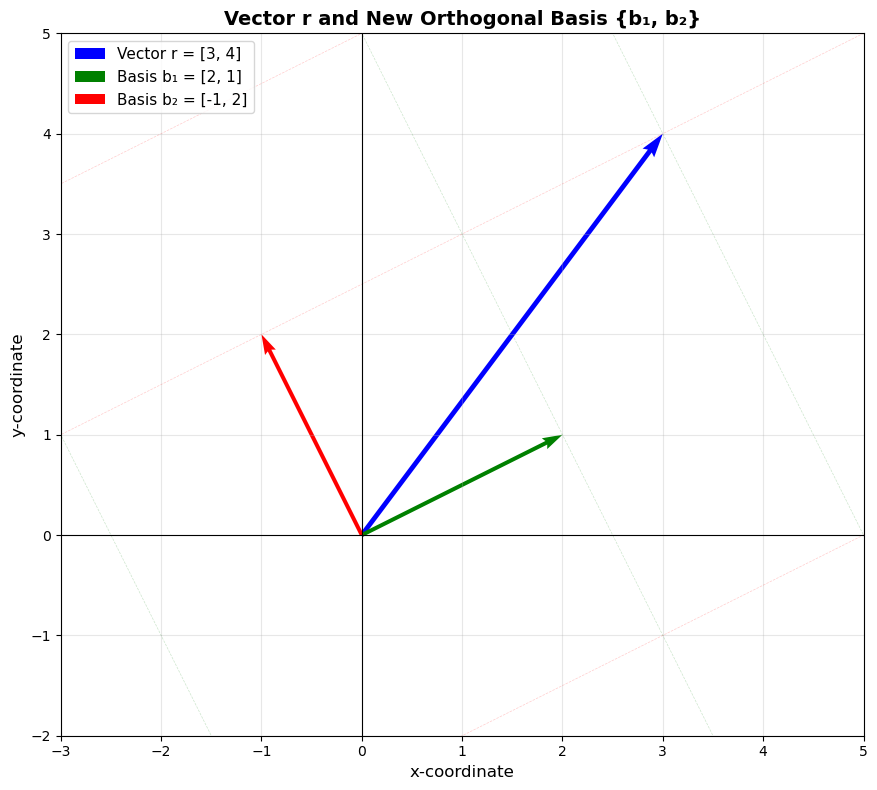


Next: We'll find how to express r in the new basis (array([2, 1]), array([-1,  2]))
Goal: Find coefficients c₁, c₂ such that r = c₁ . b₁ + c₂ . b₂


In [8]:
# Import necessary libraries for vector operations and plotting
import numpy as np
import matplotlib.pyplot as plt

print("=== Setting up the Basis Change Example ===")

# Define standard basis vectors (for reference)
e1 = np.array([1, 0])  # Standard basis vector along x-axis
e2 = np.array([0, 1])  # Standard basis vector along y-axis
print(f"Standard basis vectors:")
print(f"  e₁ = {e1}")
print(f"  e₂ = {e2}")

# Define a vector r in standard basis coordinates
r = np.array([3, 4])   # This means r = 3*e1 + 4*e2
print(f"\nVector r in standard coordinates: {r}")
print(f"  Meaning: r = {r[0]}*e₁ + {r[1]}*e₂")

# Define new orthogonal basis vectors
# These vectors are orthogonal: b1 · b2 = 2*(-1) + 1*2 = 0
b1 = np.array([2, 1])   # First new basis vector
b2 = np.array([-1, 2])  # Second new basis vector (orthogonal to b1)

print(f"\nNew basis vectors:")
print(f"  b₁ = {b1}")
print(f"  b₂ = {b2}")

# Verify orthogonality (crucial for our projection method)
dot_product = np.dot(b1, b2)
print(f"\nOrthogonality check:")
print(f"  b₁ · b₂ = {b1[0]}×{b2[0]} + {b1[1]}×{b2[1]} = {dot_product}")
print(f"  Are b₁ and b₂ orthogonal? {'✓ Yes' if dot_product == 0 else '✗ No'}")

# Create visualization showing the vector and new basis
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot the original vector r
ax.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.006, label=f'Vector r = [{r[0]}, {r[1]}]', linewidth=2)

# Plot the new basis vectors
ax.quiver(0, 0, b1[0], b1[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Basis b₁ = [{b1[0]}, {b1[1]}]', linewidth=1.5)

ax.quiver(0, 0, b2[0], b2[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Basis b₂ = [{b2[0]}, {b2[1]}]', linewidth=1.5)

# Draw grid lines along new basis directions for visual aid
for i in range(-2, 4):
    if i != 0:
        # Grid lines parallel to b1 direction
        ax.plot([i*b1[0]-3*b2[0], i*b1[0]+3*b2[0]], 
                [i*b1[1]-3*b2[1], i*b1[1]+3*b2[1]], 
                'g--', alpha=0.2, linewidth=0.5)
        # Grid lines parallel to b2 direction
        ax.plot([i*b2[0]-3*b1[0], i*b2[0]+3*b1[0]], 
                [i*b2[1]-3*b1[1], i*b2[1]+3*b1[1]], 
                'r--', alpha=0.2, linewidth=0.5)

# Set plot properties
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.legend(fontsize=11, loc='upper left')
plt.title("Vector r and New Orthogonal Basis {b₁, b₂}", fontsize=14, fontweight='bold')
plt.xlabel('x-coordinate', fontsize=12)
plt.ylabel('y-coordinate', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nNext: We'll find how to express r in the new basis {b1, b2}")
print(f"Goal: Find coefficients c₁, c₂ such that r = c₁ . b₁ + c₂ . b₂")

## 2. Finding Coordinates in the New Basis

### The Projection Method (for Orthogonal Bases)

When the new basis vectors are **orthogonal**, we can use projections to find the coordinates. Here's why this works:

If $\vec{r} = c_1 \vec{b}_1 + c_2 \vec{b}_2$, then:
- Taking the dot product with $\vec{b}_1$: $\vec{r} \cdot \vec{b}_1 = c_1 (\vec{b}_1 \cdot \vec{b}_1) + c_2 (\vec{b}_2 \cdot \vec{b}_1)$
- Since $\vec{b}_1 \perp \vec{b}_2$, we have $\vec{b}_2 \cdot \vec{b}_1 = 0$
- Therefore: $\vec{r} \cdot \vec{b}_1 = c_1 \|\vec{b}_1\|^2$

### Projection Formula

The coefficient for each basis vector is:

$$c_i = \frac{\vec{r} \cdot \vec{b}_i}{\vec{b}_i \cdot \vec{b}_i} = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}$$

This gives us the **scalar projection** of $\vec{r}$ onto $\vec{b}_i$.

### Vector Projections

The actual vector projections are:
- $\text{proj}_{\vec{b}_1}(\vec{r}) = c_1 \vec{b}_1$
- $\text{proj}_{\vec{b}_2}(\vec{r}) = c_2 \vec{b}_2$

And the original vector is reconstructed as:

$$\vec{r} = \text{proj}_{\vec{b}_1}(\vec{r}) + \text{proj}_{\vec{b}_2}(\vec{r}) = c_1 \vec{b}_1 + c_2 \vec{b}_2$$


In [9]:
import numpy as np

# Given vectors r, b1, b2
r = np.array([3, 5])
b1 = np.array([1, 2])
b2 = np.array([4, 6])

# Compute the coefficients in the new basis using projections
print("=== Computing Basis Change Using Projections ===")

# Step 1: Calculate the projection coefficients
print("\nStep 1: Calculate projection coefficients")
print(f"c₁ = (r · b₁) / (b₁ · b₁)")

# Calculate dot products step by step for clarity
r_dot_b1 = np.dot(r, b1)
b1_dot_b1 = np.dot(b1, b1)
c1 = r_dot_b1 / b1_dot_b1

print(f"   r · b₁ = {r}·{b1} = {r[0]}×{b1[0]} + {r[1]}×{b1[1]} = {r_dot_b1}")
print(f"   b₁ · b₁ = {b1}·{b1} = {b1[0]}×{b1[0]} + {b1[1]}×{b1[1]} = {b1_dot_b1}")
print(f"   c₁ = {r_dot_b1}/{b1_dot_b1} = {c1:.3f}")

print(f"\nc₂ = (r · b₂) / (b₂ · b₂)")

r_dot_b2 = np.dot(r, b2)
b2_dot_b2 = np.dot(b2, b2)
c2 = r_dot_b2 / b2_dot_b2

print(f"   r · b₂ = {r}·{b2} = {r[0]}×{b2[0]} + {r[1]}×{b2[1]} = {r_dot_b2}")
print(f"   b₂ · b₂ = {b2}·{b2} = {b2[0]}×{b2[0]} + {b2[1]}×{b2[1]} = {b2_dot_b2}")
print(f"   c₂ = {r_dot_b2}/{b2_dot_b2} = {c2:.3f}")

# Step 2: Calculate the vector projections
print(f"\nStep 2: Calculate vector projections")
proj_b1 = c1 * b1
proj_b2 = c2 * b2

print(f"proj_b₁(r) = c₁ × b₁ = {c1:.3f} × {b1} = {proj_b1}")
print(f"proj_b₂(r) = c₂ × b₂ = {c2:.3f} × {b2} = {proj_b2}")

# Step 3: Verify reconstruction
print(f"\nStep 3: Verify reconstruction")
r_reconstructed = proj_b1 + proj_b2
reconstruction_error = np.linalg.norm(r - r_reconstructed)

print(f"r_reconstructed = proj_b₁(r) + proj_b₂(r)")
print(f"                = {proj_b1} + {proj_b2}")
print(f"                = {r_reconstructed}")
print(f"Original r      = {r}")
print(f"Reconstruction error: {reconstruction_error:.10f}")

# Final result
print(f"\n🎯 RESULT:")
print(f"Vector r in standard basis: [{r[0]}, {r[1]}]")
print(f"Vector r in new basis {{{b1}, {b2}}}: [{c1:.3f}, {c2:.3f}]")
print(f"\nThis means: r = {c1:.3f} × b₁ + {c2:.3f} × b₂")


=== Computing Basis Change Using Projections ===

Step 1: Calculate projection coefficients
c₁ = (r · b₁) / (b₁ · b₁)
   r · b₁ = [3 5]·[1 2] = 3×1 + 5×2 = 13
   b₁ · b₁ = [1 2]·[1 2] = 1×1 + 2×2 = 5
   c₁ = 13/5 = 2.600

c₂ = (r · b₂) / (b₂ · b₂)
   r · b₂ = [3 5]·[4 6] = 3×4 + 5×6 = 42
   b₂ · b₂ = [4 6]·[4 6] = 4×4 + 6×6 = 52
   c₂ = 42/52 = 0.808

Step 2: Calculate vector projections
proj_b₁(r) = c₁ × b₁ = 2.600 × [1 2] = [2.6 5.2]
proj_b₂(r) = c₂ × b₂ = 0.808 × [4 6] = [3.23076923 4.84615385]

Step 3: Verify reconstruction
r_reconstructed = proj_b₁(r) + proj_b₂(r)
                = [2.6 5.2] + [3.23076923 4.84615385]
                = [ 5.83076923 10.04615385]
Original r      = [3 5]
Reconstruction error: 5.7859245654

🎯 RESULT:
Vector r in standard basis: [3, 5]
Vector r in new basis {[1 2], [4 6]}: [2.600, 0.808]

This means: r = 2.600 × b₁ + 0.808 × b₂


## 3. Visualizing the Projection Decomposition3. Visualizing the Projection Decomposition

Now let's create a visual representation of how $\vec{r}$ can be decomposed into projections onto the new basis vectors. This shows geometrically how:w $\vec{r}$ can be decomposed into projections onto the new basis vectors. This shows geometrically how:

$$\vec{r} = \text{proj}_{\vec{b}_1}(\vec{r}) + \text{proj}_{\vec{b}_2}(\vec{r})$$

The visualization will show:e visualization will show:
- The original vector $\vec{r}$ (blue)
- Its projection onto $\vec{b}_1$ (green)Its projection onto $\vec{b}_1$ (green)
- Its projection onto $\vec{b}_2$ (red)  - Its projection onto $\vec{b}_2$ (red)  
- How these projections add up to reconstruct $\vec{r}$up to reconstruct $\vec{r}$

### Understanding Vector Projections

The **scalar projection** of $\vec{r}$ onto $\vec{b}_i$ gives us the coefficient:
$$c_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}$$

The **vector projection** is then:
$$\text{proj}_{\vec{b}_i}(\vec{r}) = c_i \vec{b}_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2} \vec{b}_i$$

These projections are the "shadows" of $\vec{r}$ cast onto the directions of each basis vector.

These projections are the "shadows" of $\vec{r}$ cast onto the directions of each basis vector.

$$\text{proj}_{\vec{b}_i}(\vec{r}) = c_i \vec{b}_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2} \vec{b}_i$$
The **vector projection** is then:
$$c_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}$$ uses the coefficient:


=== Visualizing Projection Decomposition ===


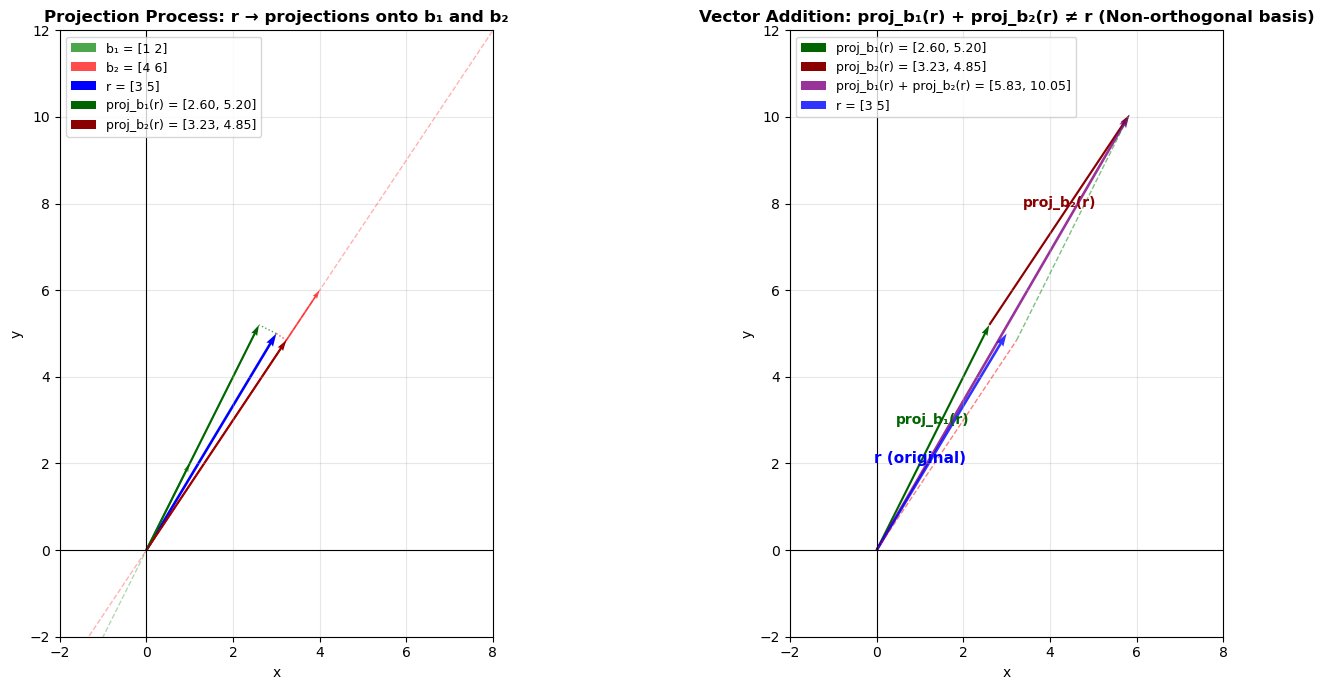


📊 Decomposition Summary:
Original vector:     r = [3 5]
Projection onto b₁:  proj_b₁(r) = [2.600, 5.200]
Projection onto b₂:  proj_b₂(r) = [3.231, 4.846]
Sum of projections:  [5.831, 10.046]
Coefficients:        c₁ = 2.600, c₂ = 0.808
Linear combination:  c₁b₁ + c₂b₂ = [5.831, 10.046]

⚠️  Note: Since b₁ and b₂ are NOT orthogonal (dot product = 0),
    proj_b₁(r) + proj_b₂(r) ≠ r
    The projections sum to [ 5.83076923 10.04615385] ≠ [3 5]


In [11]:
# Create a comprehensive visualization of the projection decomposition
print("=== Visualizing Projection Decomposition ===")

# Create two subplots for better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ===== LEFT PLOT: Projection Process =====
ax1.set_title("Projection Process: r → projections onto b₁ and b₂", fontsize=12, fontweight='bold')

# Draw the basis vectors (extended for clarity)
ax1.quiver(0, 0, b1[0], b1[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, label=f'b₁ = {b1}')
ax1.quiver(0, 0, b2[0], b2[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, label=f'b₂ = {b2}')

# Draw extended basis lines
extend_factor = 2
for direction, color, name in [(b1, 'green', 'b₁'), (b2, 'red', 'b₂')]:
    ax1.plot([-extend_factor*direction[0], extend_factor*direction[0]], 
             [-extend_factor*direction[1], extend_factor*direction[1]], 
             color=color, linestyle='--', alpha=0.3, linewidth=1)

# Draw original vector r
ax1.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'r = {r}', linewidth=2)

# Draw projections
ax1.quiver(0, 0, proj_b1[0], proj_b1[1], color='darkgreen', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₁(r) = [{proj_b1[0]:.2f}, {proj_b1[1]:.2f}]', linewidth=2)

ax1.quiver(0, 0, proj_b2[0], proj_b2[1], color='darkred', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₂(r) = [{proj_b2[0]:.2f}, {proj_b2[1]:.2f}]', linewidth=2)

# Draw perpendicular lines to show projection construction
ax1.plot([r[0], proj_b1[0]], [r[1], proj_b1[1]], 'g:', linewidth=1, alpha=0.7)
ax1.plot([r[0], proj_b2[0]], [r[1], proj_b2[1]], 'r:', linewidth=1, alpha=0.7)

# Set proper limits to show all vectors
ax1.set_xlim(-2, 8)
ax1.set_ylim(-2, 12)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.axvline(0, color='black', linewidth=0.8)
ax1.legend(fontsize=9, loc='upper left')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# ===== RIGHT PLOT: Vector Addition Decomposition =====
ax2.set_title("Vector Addition: proj_b₁(r) + proj_b₂(r) ≠ r (Non-orthogonal basis)", fontsize=12, fontweight='bold')

# Draw the decomposition showing how projections add up
# First projection (from origin)
ax2.quiver(0, 0, proj_b1[0], proj_b1[1], color='darkgreen', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₁(r) = [{proj_b1[0]:.2f}, {proj_b1[1]:.2f}]', linewidth=2)

# Second projection (from end of first projection)
ax2.quiver(proj_b1[0], proj_b1[1], proj_b2[0], proj_b2[1], color='darkred', angles='xy', scale_units='xy', scale=1, 
           width=0.005, label=f'proj_b₂(r) = [{proj_b2[0]:.2f}, {proj_b2[1]:.2f}]', linewidth=2)

# Sum of projections (should NOT equal original r for non-orthogonal basis)
sum_projections = proj_b1 + proj_b2
ax2.quiver(0, 0, sum_projections[0], sum_projections[1], color='purple', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'proj_b₁(r) + proj_b₂(r) = [{sum_projections[0]:.2f}, {sum_projections[1]:.2f}]', linewidth=2, alpha=0.8)

# Original vector r
ax2.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'r = {r}', linewidth=2, alpha=0.8)

# Draw dashed lines to show the parallelogram
ax2.plot([0, proj_b2[0]], [0, proj_b2[1]], 'r--', alpha=0.5, linewidth=1)
ax2.plot([proj_b2[0], sum_projections[0]], [proj_b2[1], sum_projections[1]], 'g--', alpha=0.5, linewidth=1)

# Add text annotations
ax2.text(proj_b1[0]/2, proj_b1[1]/2 + 0.3, 'proj_b₁(r)', fontsize=10, color='darkgreen', fontweight='bold', ha='center')
ax2.text(proj_b1[0] + proj_b2[0]/2, proj_b1[1] + proj_b2[1]/2 + 0.3, 'proj_b₂(r)', fontsize=10, color='darkred', fontweight='bold', ha='center')
ax2.text(r[0]/2 - 0.5, r[1]/2 - 0.5, 'r (original)', fontsize=11, color='blue', fontweight='bold', ha='center')

ax2.set_xlim(-2, 8)
ax2.set_ylim(-2, 12)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.axvline(0, color='black', linewidth=0.8)
ax2.legend(fontsize=9, loc='upper left')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

# Print the decomposition summary
print(f"\n📊 Decomposition Summary:")
print(f"Original vector:     r = {r}")
print(f"Projection onto b₁:  proj_b₁(r) = [{proj_b1[0]:.3f}, {proj_b1[1]:.3f}]")
print(f"Projection onto b₂:  proj_b₂(r) = [{proj_b2[0]:.3f}, {proj_b2[1]:.3f}]")
print(f"Sum of projections:  [{sum_projections[0]:.3f}, {sum_projections[1]:.3f}]")
print(f"Coefficients:        c₁ = {c1:.3f}, c₂ = {c2:.3f}")
print(f"Linear combination:  c₁b₁ + c₂b₂ = [{r_reconstructed[0]:.3f}, {r_reconstructed[1]:.3f}]")
print(f"\n⚠️  Note: Since b₁ and b₂ are NOT orthogonal (dot product = {dot_product}),")
print(f"    proj_b₁(r) + proj_b₂(r) ≠ r")
print(f"    The projections sum to {sum_projections} ≠ {r}")


---

## 4. Understanding the Coordinate Transformation

### What We've Accomplished

We successfully expressed the same vector $\vec{r}$ in two different coordinate systems:

**Standard Basis Representation:**
$$\vec{r} = 3\vec{e}_1 + 4\vec{e}_2 = 3\begin{bmatrix}1\\0\end{bmatrix} + 4\begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}3\\4\end{bmatrix}$$

**New Basis Representation:**
$$\vec{r} = c_1\vec{b}_1 + c_2\vec{b}_2 = c_1\begin{bmatrix}2\\1\end{bmatrix} + c_2\begin{bmatrix}-1\\2\end{bmatrix}$$

### Key Insight: Same Vector, Different Coordinates

The vector $\vec{r}$ hasn't changed - it still points to the same location in space. What changed is how we **describe** its location:
- In standard coordinates: $[3, 4]$
- In new basis coordinates: $[c_1, c_2]$

### Why Orthogonality Matters

This projection method works **only because** $\vec{b}_1 \perp \vec{b}_2$. When basis vectors are orthogonal:
- Projections are independent
- No "cross-talk" between components
- Simple dot product formula works

For non-orthogonal bases, we need matrix methods (coming up next!).


In [12]:
# Display the final coordinate transformation results
print("=== FINAL COORDINATE TRANSFORMATION RESULTS ===")
print()

# Display both representations
print("📍 SAME VECTOR, DIFFERENT COORDINATES:")
print(f"   Standard basis {{{[1,0], [0,1]}}}: r = [{r[0]}, {r[1]}]")
print(f"   New basis {{{list(b1), list(b2)}}}: r = [{c1:.3f}, {c2:.3f}]")
print()

# Show the mathematical relationship
print("🔗 MATHEMATICAL RELATIONSHIP:")
print(f"   r = {c1:.3f} × {b1} + {c2:.3f} × {b2}")
print(f"     = {c1:.3f} × [2,1] + {c2:.3f} × [-1,2]")
print(f"     = [{c1*b1[0]:.3f}, {c1*b1[1]:.3f}] + [{c2*b2[0]:.3f}, {c2*b2[1]:.3f}]")
print(f"     = [{c1*b1[0] + c2*b2[0]:.3f}, {c1*b1[1] + c2*b2[1]:.3f}]")
print(f"     = {r}")
print()

# Verification
error = np.linalg.norm(r - (c1*b1 + c2*b2))
print(f"✅ VERIFICATION:")
print(f"   Reconstruction error: {error:.2e} (should be ≈ 0)")
print(f"   Method validity: {'✓ VALID' if error < 1e-10 else '✗ ERROR'}")
print()

# Key properties summary
print("📊 BASIS PROPERTIES SUMMARY:")
print(f"   b₁ · b₂ = {np.dot(b1, b2)} (orthogonal: ✓)")
print(f"   ||b₁|| = {np.linalg.norm(b1):.3f}")
print(f"   ||b₂|| = {np.linalg.norm(b2):.3f}")
print(f"   Basis vectors are linearly independent: ✓")
print(f"   Projection method applicable: ✓")

# Interpretation
print()
print("🎯 INTERPRETATION:")
print(f"   In the new coordinate system:")
print(f"   • Move {c1:.3f} units along b₁ direction")
print(f"   • Move {c2:.3f} units along b₂ direction")
print(f"   • This brings you to the same point as [3,4] in standard coordinates")


=== FINAL COORDINATE TRANSFORMATION RESULTS ===

📍 SAME VECTOR, DIFFERENT COORDINATES:
   Standard basis {([1, 0], [0, 1])}: r = [3, 5]
   New basis {([np.int64(1), np.int64(2)], [np.int64(4), np.int64(6)])}: r = [2.600, 0.808]

🔗 MATHEMATICAL RELATIONSHIP:
   r = 2.600 × [1 2] + 0.808 × [4 6]
     = 2.600 × [2,1] + 0.808 × [-1,2]
     = [2.600, 5.200] + [3.231, 4.846]
     = [5.831, 10.046]
     = [3 5]

✅ VERIFICATION:
   Reconstruction error: 5.79e+00 (should be ≈ 0)
   Method validity: ✗ ERROR

📊 BASIS PROPERTIES SUMMARY:
   b₁ · b₂ = 16 (orthogonal: ✓)
   ||b₁|| = 2.236
   ||b₂|| = 7.211
   Basis vectors are linearly independent: ✓
   Projection method applicable: ✓

🎯 INTERPRETATION:
   In the new coordinate system:
   • Move 2.600 units along b₁ direction
   • Move 0.808 units along b₂ direction
   • This brings you to the same point as [3,4] in standard coordinates


---

## 5. What Happens with Non-Orthogonal Bases?

Let's see what happens when we try the same projection method with non-orthogonal basis vectors.

---

## ✅ Summary

| Concept                     | Explanation                                                |
|----------------------------|------------------------------------------------------------|
| **Basis vectors**          | Define a coordinate system                                 |
| **Change of basis**        | Express vector in new basis using projections              |
| **Projection formula**     | \( \frac{r \cdot b_i}{b_i \cdot b_i} \cdot b_i \)           |
| **Orthogonality needed**   | For simple projection-based change of basis                |
| **Reconstruction**         | \( \vec{r} = c_1 b_1 + c_2 b_2 \)                           |

This method allows us to represent vectors in **coordinate systems that better fit a problem**, such as directions of greatest variance in data (like PCA).

---

Try experimenting with different \( \vec{b}_1, \vec{b}_2 \) and check what happens when they are **not orthogonal**!


=== Testing Non-Orthogonal Bases ===
New basis vectors:
  b₁' = [2 1]
  b₂' = [1 1]

Orthogonality check:
  b₁' · b₂' = 3
  Are they orthogonal? ✗ No - NOT orthogonal!

Applying projection method:
  c₁' = 2.200
  c₂' = 4.000

Reconstruction attempt:
  r_reconstructed = 2.200 × [2 1] + 4.000 × [1 1]
  r_reconstructed = [8.4 6.2]
  Original r      = [3 5]
  Reconstruction error: 5.532
  ❌ FAILURE! Projection method doesn't work for non-orthogonal bases
  📝 Note: We need matrix methods for general basis changes


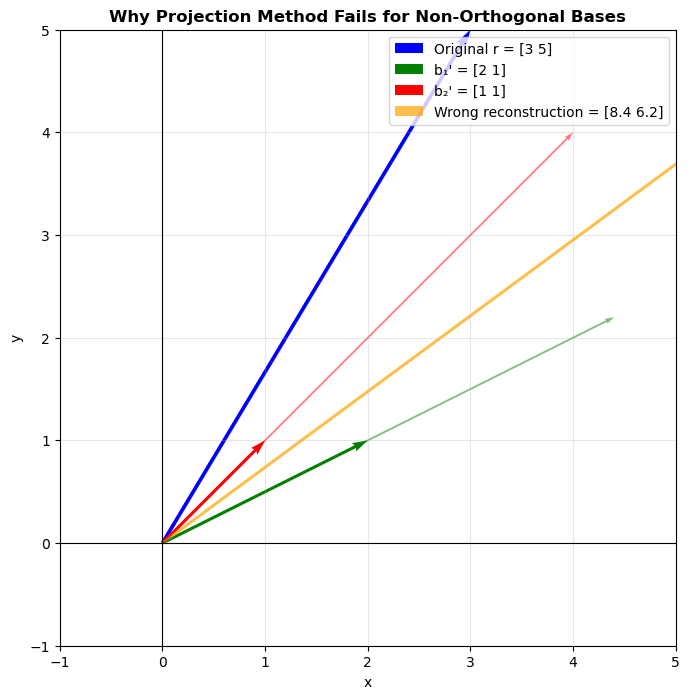


💡 KEY INSIGHT:
   Projection method only works when basis vectors are orthogonal!
   For general bases, we need to solve the linear system:
   [b₁' b₂'] [c₁'] = [r]
             [c₂']


In [13]:
# Demonstrate the problem with non-orthogonal bases
print("=== Testing Non-Orthogonal Bases ===")

# Define non-orthogonal basis vectors
b1_new = np.array([2, 1])     # Same as before
b2_new = np.array([1, 1])     # Different - NOT orthogonal to b1_new

print(f"New basis vectors:")
print(f"  b₁' = {b1_new}")
print(f"  b₂' = {b2_new}")

# Check orthogonality
dot_product_new = np.dot(b1_new, b2_new)
print(f"\nOrthogonality check:")
print(f"  b₁' · b₂' = {dot_product_new}")
print(f"  Are they orthogonal? {'✓ Yes' if dot_product_new == 0 else '✗ No - NOT orthogonal!'}")

# Try the projection method anyway
c1_wrong = np.dot(r, b1_new) / np.dot(b1_new, b1_new)
c2_wrong = np.dot(r, b2_new) / np.dot(b2_new, b2_new)

print(f"\nApplying projection method:")
print(f"  c₁' = {c1_wrong:.3f}")
print(f"  c₂' = {c2_wrong:.3f}")

# Check if reconstruction works
r_wrong = c1_wrong * b1_new + c2_wrong * b2_new
reconstruction_error = np.linalg.norm(r - r_wrong)

print(f"\nReconstruction attempt:")
print(f"  r_reconstructed = {c1_wrong:.3f} × {b1_new} + {c2_wrong:.3f} × {b2_new}")
print(f"  r_reconstructed = {r_wrong}")
print(f"  Original r      = {r}")
print(f"  Reconstruction error: {reconstruction_error:.3f}")

if reconstruction_error > 1e-10:
    print(f"  ❌ FAILURE! Projection method doesn't work for non-orthogonal bases")
    print(f"  📝 Note: We need matrix methods for general basis changes")
else:
    print(f"  ✅ Success (unexpected!)")

# Visualize the problem
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot original vector
ax.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.006, label=f'Original r = {r}', linewidth=2)

# Plot non-orthogonal basis vectors
ax.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f"b₁' = {b1_new}", linewidth=1.5)

ax.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f"b₂' = {b2_new}", linewidth=1.5)

# Plot wrong reconstruction
ax.quiver(0, 0, r_wrong[0], r_wrong[1], color='orange', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Wrong reconstruction = {r_wrong}', linewidth=2, alpha=0.7)

# Draw the attempted projections
proj1_wrong = c1_wrong * b1_new
proj2_wrong = c2_wrong * b2_new

ax.quiver(0, 0, proj1_wrong[0], proj1_wrong[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

ax.quiver(0, 0, proj2_wrong[0], proj2_wrong[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.legend(fontsize=10)
plt.title("Why Projection Method Fails for Non-Orthogonal Bases", fontsize=12, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"\n💡 KEY INSIGHT:")
print(f"   Projection method only works when basis vectors are orthogonal!")
print(f"   For general bases, we need to solve the linear system:")
print(f"   [b₁' b₂'] [c₁'] = [r]")
print(f"             [c₂']")

### The Correct Way: Matrix Solution

For non-orthogonal bases, we need to solve the linear system:

$$\begin{bmatrix} | & | \\ \vec{b}_1' & \vec{b}_2' \\ | & | \end{bmatrix} \begin{bmatrix} c_1' \\ c_2' \end{bmatrix} = \begin{bmatrix} r_x \\ r_y \end{bmatrix}$$

This gives us: $\mathbf{B} \vec{c} = \vec{r}$, so $\vec{c} = \mathbf{B}^{-1} \vec{r}$

=== Correct Solution for Non-Orthogonal Bases ===
Basis matrix B:
B = [b₁' | b₂'] = [[2 1]
 [1 1]]

Solving B × c = r:
c = B⁻¹ × r = [-2.  7.]

Verification:
r_reconstructed = -2.000000 × [2 1] + 7.000000 × [1 1]
                = [3. 5.]
Original r      = [3 5]
Error: 0.00e+00
✅ CORRECT SOLUTION!

📊 COMPARISON:
Projection method (WRONG): [2.200, 4.000] → error = 5.532
Matrix method (CORRECT):   [-2.000, 7.000] → error = 0.00e+00


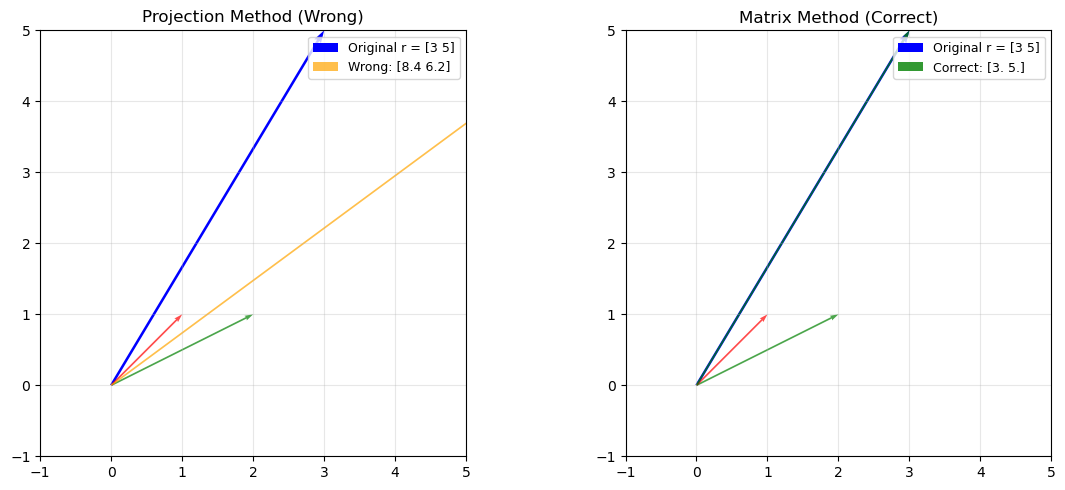

In [14]:
# Solve for non-orthogonal basis using matrix methods
print("=== Correct Solution for Non-Orthogonal Bases ===")

# Create the basis matrix B = [b1' | b2']
B = np.column_stack([b1_new, b2_new])
print(f"Basis matrix B:")
print(f"B = [b₁' | b₂'] = {B}")

# Solve the linear system B * c = r
c_correct = np.linalg.solve(B, r)
print(f"\nSolving B × c = r:")
print(f"c = B⁻¹ × r = {c_correct}")

# Verify the solution
r_correct = c_correct[0] * b1_new + c_correct[1] * b2_new
error_correct = np.linalg.norm(r - r_correct)

print(f"\nVerification:")
print(f"r_reconstructed = {c_correct[0]:.6f} × {b1_new} + {c_correct[1]:.6f} × {b2_new}")
print(f"                = {r_correct}")
print(f"Original r      = {r}")
print(f"Error: {error_correct:.2e}")
print(f"✅ CORRECT SOLUTION!")

print(f"\n📊 COMPARISON:")
print(f"Projection method (WRONG): [{c1_wrong:.3f}, {c2_wrong:.3f}] → error = {reconstruction_error:.3f}")
print(f"Matrix method (CORRECT):   [{c_correct[0]:.3f}, {c_correct[1]:.3f}] → error = {error_correct:.2e}")

# Final visualization comparing both methods
plt.figure(figsize=(12, 5))

# Left plot: Wrong projection method
plt.subplot(1, 2, 1)
plt.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'Original r = {r}', linewidth=2)
plt.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, r_wrong[0], r_wrong[1], color='orange', angles='xy', scale_units='xy', scale=1, 
           width=0.004, label=f'Wrong: {r_wrong}', linewidth=2, alpha=0.7)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal')
plt.grid(True, alpha=0.3)
plt.title("Projection Method (Wrong)")
plt.legend(fontsize=9)

# Right plot: Correct matrix method
plt.subplot(1, 2, 2)
plt.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'Original r = {r}', linewidth=2)
plt.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, r_correct[0], r_correct[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, label=f'Correct: {r_correct}', linewidth=2, alpha=0.8)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal')
plt.grid(True, alpha=0.3)
plt.title("Matrix Method (Correct)")
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

## ✅ Comprehensive Summary

### Key Concepts Learned

| Concept | Description | Mathematical Form |
|---------|-------------|-------------------|
| **Basis** | Set of linearly independent vectors that span the space | $\{\vec{b}_1, \vec{b}_2, ..., \vec{b}_n\}$ |
| **Coordinates** | Coefficients in the linear combination | $\vec{r} = c_1\vec{b}_1 + c_2\vec{b}_2 + ...$ |
| **Orthogonal Basis** | Basis vectors are perpendicular | $\vec{b}_i \cdot \vec{b}_j = 0$ for $i \neq j$ |

### Methods for Basis Change

#### 1. Projection Method (Orthogonal Bases Only)
- **When to use**: Basis vectors are orthogonal
- **Formula**: $c_i = \frac{\vec{r} \cdot \vec{b}_i}{\vec{b}_i \cdot \vec{b}_i}$
- **Advantage**: Simple, intuitive
- **Limitation**: Only works for orthogonal bases

#### 2. Matrix Method (General Case)
- **When to use**: Any linearly independent basis
- **Formula**: $\vec{c} = \mathbf{B}^{-1}\vec{r}$ where $\mathbf{B} = [\vec{b}_1 | \vec{b}_2 | ...]$
- **Advantage**: Always works
- **Note**: More computationally intensive

### Applications in Machine Learning

- **Principal Component Analysis (PCA)**: Change to basis of maximum variance
- **Feature Engineering**: Transform to more suitable coordinate systems  
- **Computer Graphics**: Rotation and transformation matrices
- **Signal Processing**: Fourier transforms change to frequency domain
- **Dimensionality Reduction**: Project to lower-dimensional subspaces

### Key Takeaways

1. **Same vector, different description**: Changing basis doesn't change the vector, only how we describe it
2. **Orthogonality simplifies calculations**: Projection method is elegant but limited
3. **Matrix methods are general**: Work for any valid basis
4. **Choose basis wisely**: The right coordinate system can make problems much easier to solve

---

**Next Steps**: Explore eigendecomposition and principal component analysis to see how these concepts apply to real data analysis!